<a href="https://colab.research.google.com/github/AhmedWael2000/word2vec/blob/main/Word2Vec_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Word Embedding?


Word embedding is a technique in natural language processing that represents words as numerical vectors in a multi-dimensional space. It's used to capture semantic relationships between words and their contexts in a way that machine learning algorithms can understand. These embeddings are employed in various NLP tasks like language translation, sentiment analysis, and document clustering, enhancing the understanding of language and improving the accuracy of models.

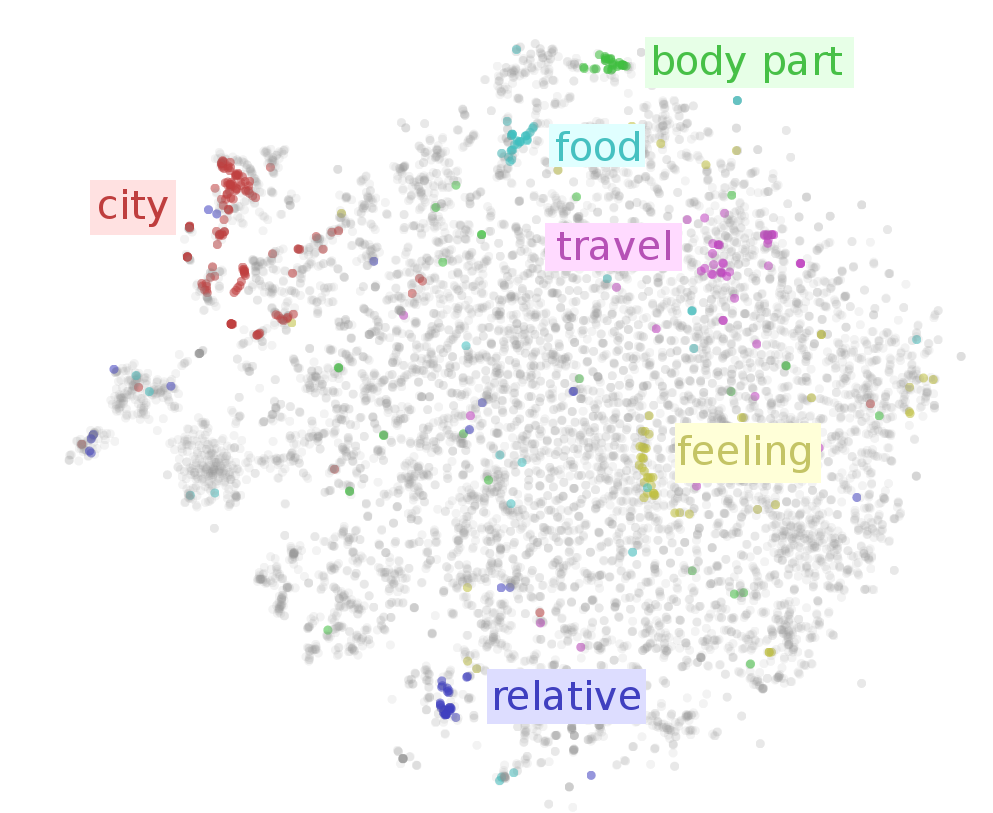

# Imports

In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
# Load the stopwords for English
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Functions

In [ ]:
# define preprocessing function
def preprocess_text(content):
  sentences = sent_tokenize(content)
  tokenizer = RegexpTokenizer(r"[a-zA-Z0-9]+")
  sentences = [tokenizer.tokenize(sent) for sent in sentences]
  filtered_sentences = []
  for sentence in sentences:
      words = sentence
      filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
      filtered_sentences.append(filtered_words)
  return filtered_sentences

In [ ]:
def filewords(path):
  file_ = open(path,'r')
  content = file_.read()
  file_.close()
  content_sentence=preprocess_text(content)
  return  [item for sublist in content_sentence for item in sublist]

In [ ]:
#define Jaccard similarity function
def jaccard_similarity(list1, list2):
  set1 = set(list1)
  set2 = set(list2)
  intersection = set1.intersection(set2)
  union = set1.union(set2)
  similarity = len(intersection)/len(union)
  return similarity


In [ ]:
# cosine similarity
def cosine_similarity(vector1, vector2):
    dot_product = sum(a*b for a, b in zip(vector1, vector2))
    norm1 = sum(a*a for a in vector1) ** 0.5
    norm2 = sum(b*b for b in vector2) ** 0.5
    return dot_product / (norm1 * norm2)

# Reading Files And Processing Its Content

Read File 1 and tokenize the sentences

In [ ]:
file1 = open('/content/life on mars.txt','r')
content1 = file1.read()
file1.close()
content1_sent=preprocess_text(content1)


Read File 2 and tokenize sentences

In [ ]:
file2 = open('/content/shopping.txt','r')
content2 = file2.read()
file2.close()
content2_sent=preprocess_text(content2)


Read File 3 and tokenize sentences

In [ ]:
file3 = open('/content/life on mars summary.txt','r')
content3 = file3.read()
file3.close()
content3_sent=preprocess_text(content3)


Read File 4 and tokenize sentences

In [ ]:
file4 = open('/content/shopping_summary.txt','r')
content4 = file4.read()
file4.close()
content4_sent=preprocess_text(content4)


# Modeling

In [ ]:
# prepairing tokenized sentences
total_content = content1_sent+ content2_sent + content3_sent + content4_sent
len(total_content),len(content1_sent),len(content2_sent), len(content3_sent), len(content4_sent)

(73, 32, 27, 8, 6)

In [ ]:
total_content[0:3]

[['new',
  'study',
  'published',
  'journal',
  'science',
  'shows',
  'definitive',
  'evidence',
  'organic',
  'matter',
  'surface',
  'mars'],
 ['data', 'collected', 'nasa', 'nuclear', 'powered', 'rover', 'curiosity'],
 ['confirms',
  'earlier',
  'findings',
  'red',
  'planet',
  'contained',
  'carbon',
  'based',
  'compounds']]

In [ ]:
# creating and training word2vec model
model = Word2Vec(total_content, vector_size=2, alpha=0.0025, window=3, min_count=1)
model.train(total_content, total_examples=len(total_content), epochs=30)

(20958, 24060)

In [ ]:
# model vocab
model_keys=model.wv.key_to_index.keys()

# Getting Word2Vec For Files

In [ ]:
# getting words for each file
mars_words = filewords('/content/life on mars.txt')
shopping_words = filewords('/content/shopping.txt')
mars_s_words = filewords('/content/life on mars summary.txt')
shopping_s_words = filewords('/content/shopping_summary.txt')

In [ ]:
# getting word vectors for each file
mars_vec = model.wv[mars_words].mean(axis=0)
shopping_vec = model.wv[shopping_words].mean(axis=0)
mars_s_vec = model.wv[mars_s_words].mean(axis=0)
shopping_s_vec = model.wv[shopping_s_words].mean(axis=0)

# Similarity Measures

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances


Measuring Similarity between Mars and Mars summary files

In [ ]:
print("jaccard similarity:")
print(jaccard_similarity(mars_s_words,mars_words))
print("cosine similarity:")
cos_similarity_1 = cosine_similarity([mars_s_vec,mars_vec])
print(cos_similarity_1[0,1])
print("Euclidean Distance:")
euclidean_distances([mars_s_vec,mars_vec])[0,1]

jaccard similarity:
0.15298507462686567
cosine similarity:
0.990999
Euclidean Distance:


0.011814401

The cosine similarity appears to be close to 1, indicating a great of similarity between the two files.

Measuring Similarity between Mars and shopping summary files

In [ ]:
print("jaccard similarity:")
print(jaccard_similarity(shopping_s_words,mars_words))
print("cosine similarity:")
cos_similarity_2 = cosine_similarity([shopping_s_vec,mars_vec])
print(cos_similarity_2[0,1])
print("Euclidean Distance:")
euclidean_distances([shopping_s_vec,mars_vec])[0,1]

jaccard similarity:
0.010380622837370242
cosine similarity:
-0.6292015
Euclidean Distance:


0.0659317

The cosine similarity appears to be close to -1, indicating a lack of similarity between the two files.

# Visualization

Document Vectors

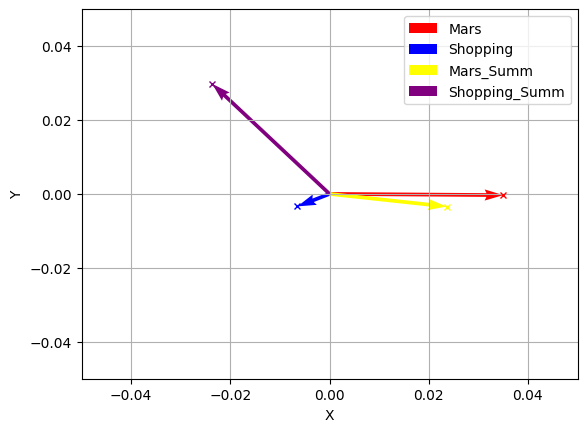

In [ ]:

plt.plot(mars_vec[0], mars_vec[1], color="red", marker = 'x', markersize=5)
plt.plot(shopping_vec[0], shopping_vec[1], color="blue", marker = 'x', markersize=5)
plt.plot(mars_s_vec[0], mars_s_vec[1], color="yellow", marker = 'x', markersize=5)
plt.plot(shopping_s_vec[0], shopping_s_vec[1], color="purple", marker = 'x', markersize=5)


# Plot the vector as an arrow
plt.quiver(0, 0, mars_vec[0], mars_vec[1], angles="xy", scale_units="xy", scale=1, color="red", label = 'Mars')
plt.quiver(0, 0, shopping_vec[0], shopping_vec[1], angles="xy", scale_units="xy", scale=1, color="blue", label = 'Shopping')
plt.quiver(0, 0, mars_s_vec[0], mars_s_vec[1], angles="xy", scale_units="xy", scale=1, color="yellow", label = 'Mars_Summ')
plt.quiver(0, 0, shopping_s_vec[0], shopping_s_vec[1], angles="xy", scale_units="xy", scale=1, color="purple", label = 'Shopping_Summ')

# Set the limits for the plot
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])

# Set labels for the plot
plt.xlabel("X")
plt.ylabel("Y")

# Show grid lines
plt.grid()

# Display the plot
plt.legend()
plt.show()

Cosine Similarity Heatmap

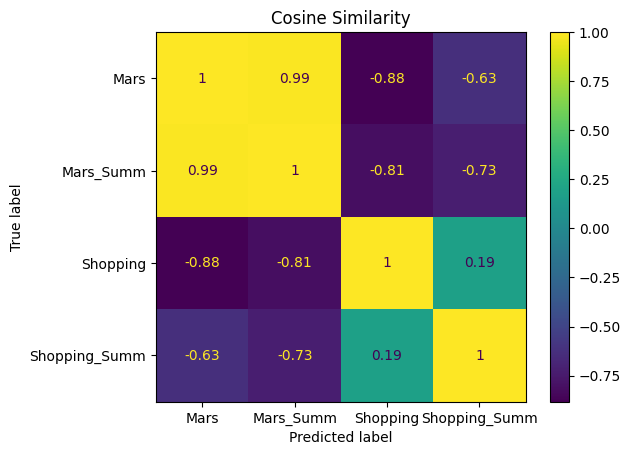

In [ ]:

vecs = np.array([mars_vec, mars_s_vec, shopping_vec, shopping_s_vec])
labels = ['Mars', 'Mars_Summ', 'Shopping', 'Shopping_Summ']
cos_sim = cosine_similarity(vecs)
ConfusionMatrixDisplay(cos_sim, display_labels = labels).plot()
plt.title("Cosine Similarity")
plt.show()

Euclidean Distance Heatmap

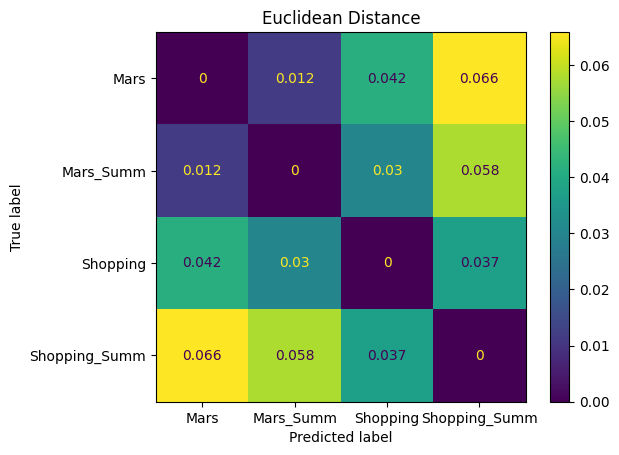

In [ ]:
euc_dis = euclidean_distances(vecs)
ConfusionMatrixDisplay(euc_dis, display_labels = labels).plot()
plt.title("Euclidean Distance")
plt.show()

Multidimentional Scalling MDS

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


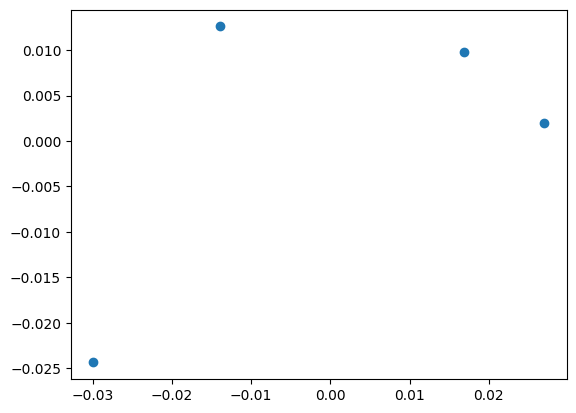

In [ ]:
from sklearn.manifold import MDS

# Embed the vectors in a 2D space using MDS
mds = MDS(n_components=2, dissimilarity='euclidean')
embedded_vectors = mds.fit_transform(vecs)
plt.scatter(embedded_vectors[:, 0], embedded_vectors[:, 1]);